## Project 3


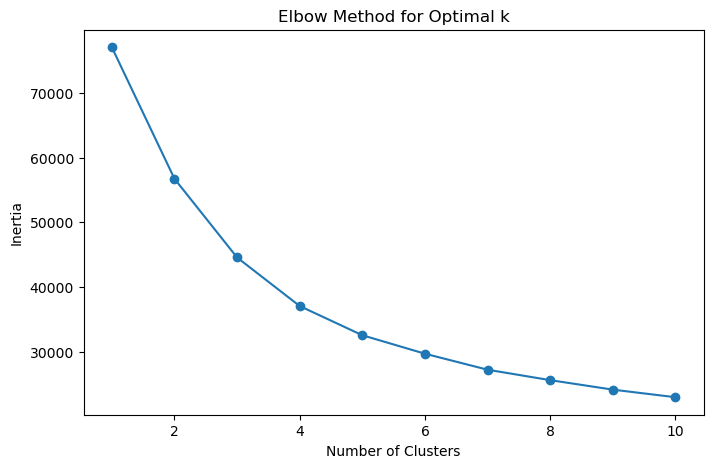

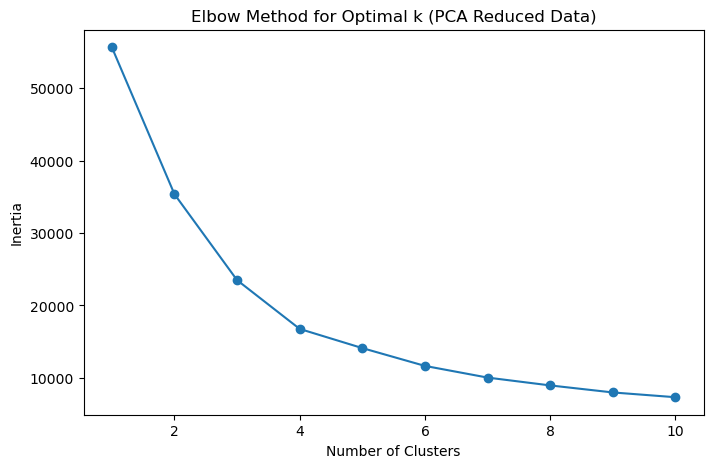

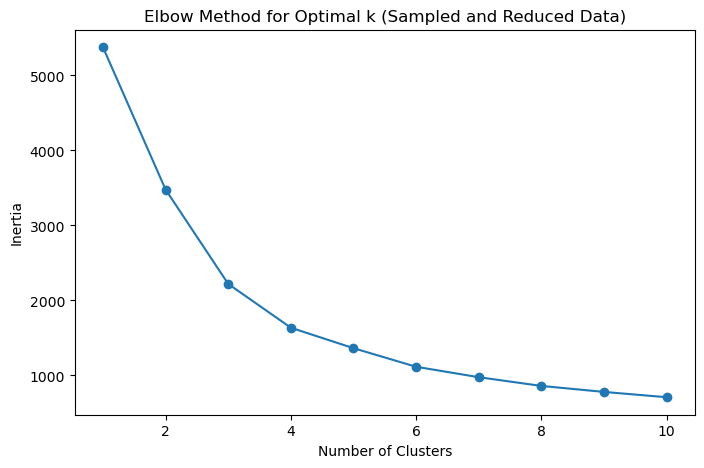

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = 'all_seasons.csv'
nba_data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
nba_data.head()

# Check for missing values in the dataset
missing_values = nba_data.isnull().sum()
missing_values[missing_values > 0]  # Display columns with missing values

# Select columns for standardization
columns_to_scale = ['age', 'player_height', 'player_weight', 'pts', 'reb', 'ast']

# Initialize the scaler and scale the selected columns
scaler = StandardScaler()
nba_data[columns_to_scale] = scaler.fit_transform(nba_data[columns_to_scale])

# Display the standardized columns to verify
nba_data[columns_to_scale].head()

# Use the Elbow method to find the optimal number of clusters
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(nba_data[columns_to_scale])
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply PCA to reduce dimensionality for faster computation
pca = PCA(n_components=2)  # Reducing to 2 principal components for visualization purposes
nba_data_reduced = pca.fit_transform(nba_data[columns_to_scale])

# Retry the Elbow method with reduced data
inertia = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(nba_data_reduced)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve with reduced data
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (PCA Reduced Data)')
plt.show()

# Sample a subset of the data to speed up processing
nba_data_sample = nba_data.sample(frac=0.1, random_state=42)

# Apply PCA on the sampled data
nba_data_sample_reduced = pca.fit_transform(nba_data_sample[columns_to_scale])

# Retry the Elbow method on the sampled and reduced data
inertia_sample = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(nba_data_sample_reduced)
    inertia_sample.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia_sample, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (Sampled and Reduced Data)')
plt.show()


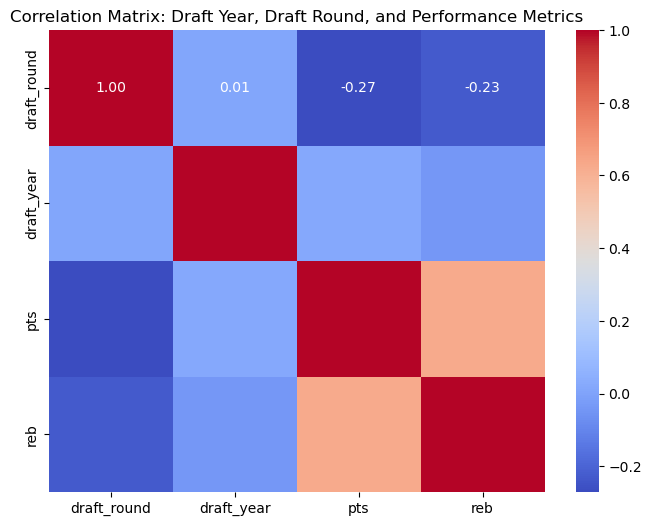

In [6]:
# Reload necessary libraries and dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'all_seasons.csv'
data = pd.read_csv(file_path)

# Select relevant features for correlation analysis
correlation_data = data[['draft_round', 'draft_year', 'pts', 'reb']].dropna()

# Convert 'draft_round' to numeric and 'draft_year' to integer for analysis
correlation_data['draft_round'] = pd.to_numeric(correlation_data['draft_round'], errors='coerce')
correlation_data['draft_year'] = pd.to_numeric(correlation_data['draft_year'], errors='coerce')

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Draft Year, Draft Round, and Performance Metrics')
plt.show()




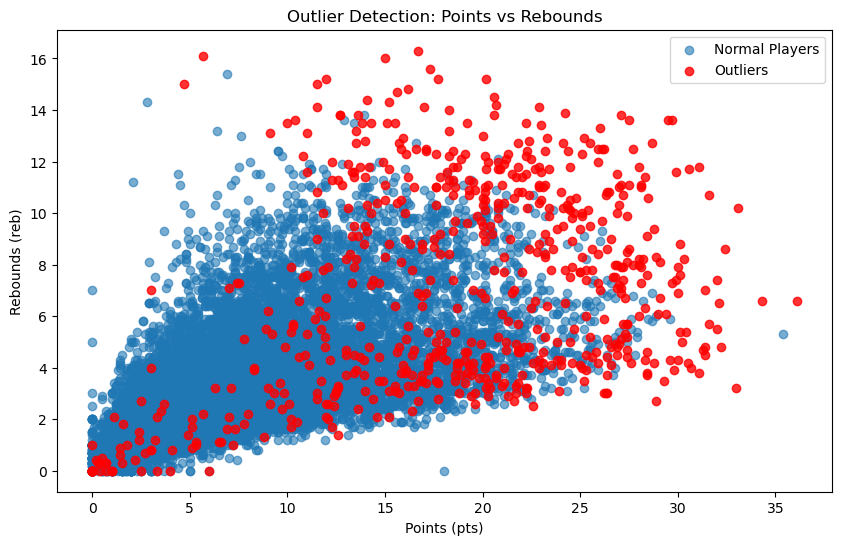

In [10]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Reload the dataset
file_path = 'all_seasons.csv'
data = pd.read_csv(file_path)

# Select relevant features for outlier detection
outlier_features = data[['pts', 'reb', 'ast', 'player_height', 'player_weight']].dropna()

# Standardize the data for analysis
scaler = StandardScaler()
scaled_outlier_features = scaler.fit_transform(outlier_features)

# Apply Isolation Forest for outlier detection
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
outlier_predictions = isolation_forest.fit_predict(scaled_outlier_features)

# Add outlier labels to the dataset
outlier_features['Outlier'] = outlier_predictions
data_with_outliers = data.loc[outlier_features.index]
data_with_outliers['Outlier'] = outlier_predictions

# Separate normal players and outliers
outliers = data_with_outliers[data_with_outliers['Outlier'] == -1]
normal_players = data_with_outliers[data_with_outliers['Outlier'] == 1]

# Display summary of detected outliers
outlier_summary = outliers[['player_name', 'pts', 'reb', 'ast', 'player_height', 'player_weight']]
outlier_summary.reset_index(drop=True, inplace=True)

# Show results to the user
outlier_summary.head() 

import matplotlib.pyplot as plt

# Visualize the outliers and normal players based on points and rebounds
plt.figure(figsize=(10, 6))
plt.scatter(
    normal_players['pts'], 
    normal_players['reb'], 
    label='Normal Players', 
    alpha=0.6
)
plt.scatter(
    outliers['pts'], 
    outliers['reb'], 
    color='red', 
    label='Outliers', 
    alpha=0.8
)
plt.title('Outlier Detection: Points vs Rebounds')
plt.xlabel('Points (pts)')
plt.ylabel('Rebounds (reb)')
plt.legend()
plt.show()

